In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from xgboost import XGBRegressor
from sklearn import metrics  

import warnings
warnings.filterwarnings("ignore")


In [5]:
bigMartDataSet=pd.read_csv("C:/Users/sagar/Desktop/data analytics all project/Big Mart sales prediction/dataset/Train.csv")
bigMartDataSet.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Information of dataset
bigMartDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Fill Missing Values:-

In [7]:
# Find missing values in each column
bigMartDataSet.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
## Handling missing values
# Item_Weight  and Outlet_Size ye dono column me missing values h   

# Fill means value in all rows of Item_Weight
bigMartDataSet['Item_Weight'].fillna(bigMartDataSet['Item_Weight'].mean(),inplace=True)


In [9]:

# Fill means value in all rows of Outlet_Size
# Outlet_Size ek string type hai to isme mean nhi laga sakte,bacause mean sirf INT type ke sath lgta h
# hum outlet_type ka values outlet_size me fill krenge mod laga ke

mode1=bigMartDataSet.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]) )

In [10]:
# miss values find karte h and jo value missing hoga usme mod fill kar denge upar wala
miss_values=bigMartDataSet['Outlet_Size'].isnull()
miss_values  
#Trur->waha missing value h and False-> missing value nhi h

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [11]:
bigMartDataSet.loc[miss_values,'Outlet_Size']=bigMartDataSet.loc[miss_values,'Outlet_Type'].apply(lambda x:mode1[x])

In [12]:
# ab saara null values fill ho gya
bigMartDataSet.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

chart for Data Analysis:-

In [13]:
bigMartDataSet.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


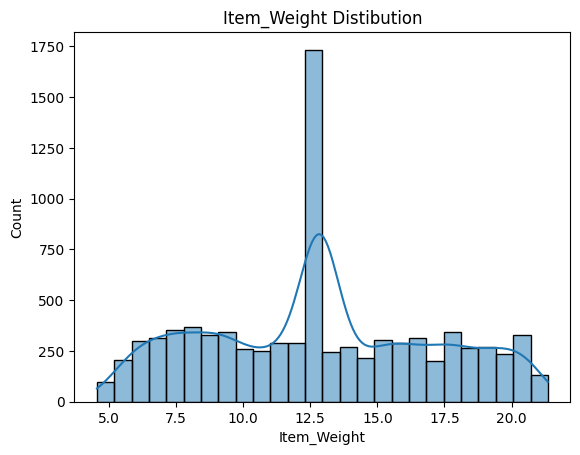

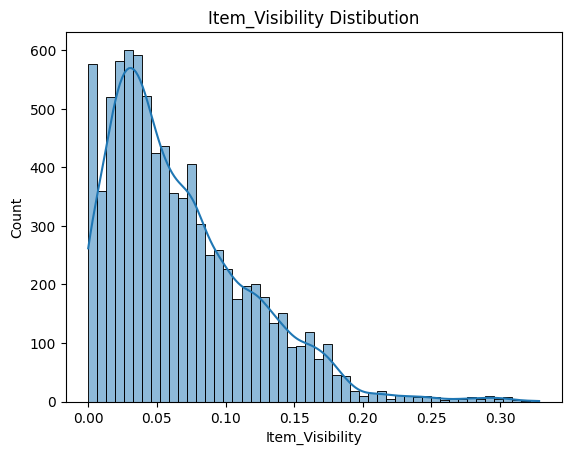

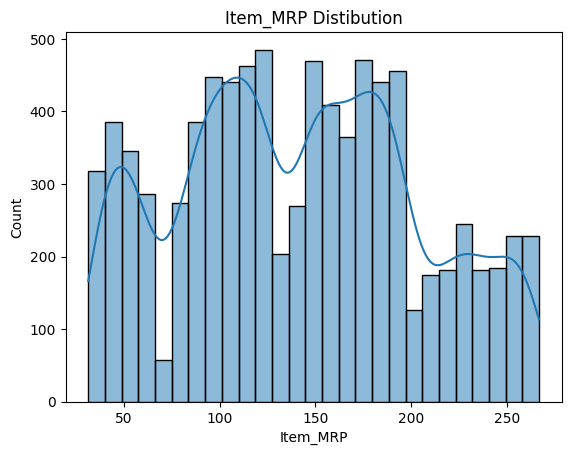

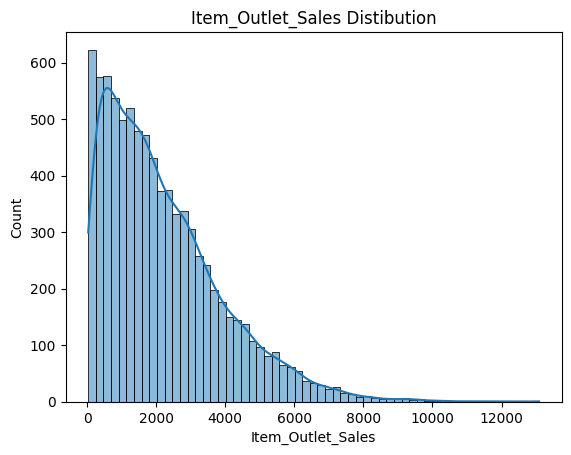

In [14]:
#plot Hisplot for numerical columns
col=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales' ]
for i in col:
    plt.Figure(figsize=(6,6))
    sns.histplot(bigMartDataSet[i],kde=True,palette='muted')
    plt.title(f'{i} Distibution')
    plt.show()

In [ ]:
# Explain above chart
# i.Item weight Distribution
# 5 minimum value h and 20 maximum value.
# bich me graph long isliye hua because item_weight ko mean se fill kiye the,to bich me mean value liye honge.


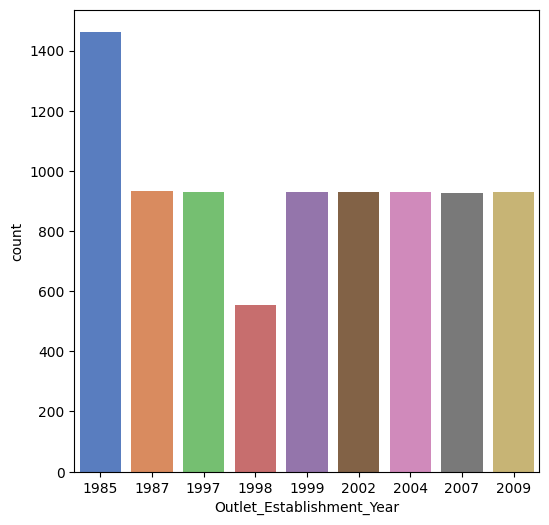

In [15]:
#chart of Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=bigMartDataSet,palette='muted')
plt.show()

Categorical Features

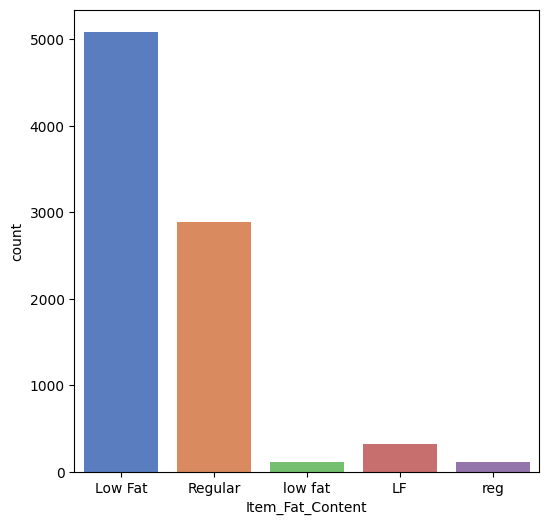

In [16]:
# Item fat content
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=bigMartDataSet,palette='muted')
plt.show()

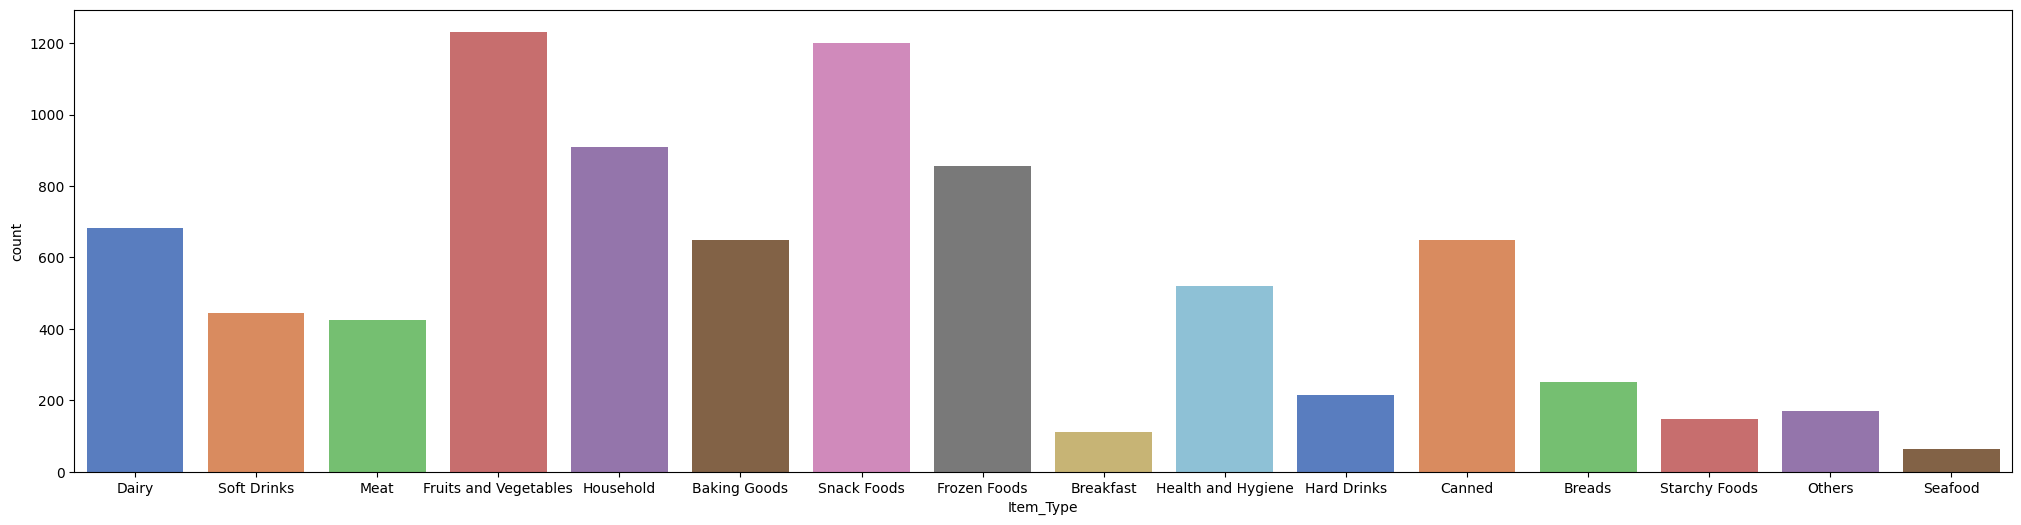

In [24]:
#Item type column
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data=bigMartDataSet,palette='muted')
plt.show()

DATA PRE-PROCESSING


In [27]:
bigMartDataSet.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,Small,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [31]:
bigMartDataSet['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [30]:
# reg and rugular dono same h ,isko reg ko replace krke regular karna h haar jagah
# similarly,LF ,Low Fat and low fat  sab same h

bigMartDataSet['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

Splitting features and Target

In [32]:
X=bigMartDataSet.drop(columns='Item_Outlet_Sales',axis=1)
Y=bigMartDataSet['Item_Outlet_Sales']

Splitting Data into Training and Testing

In [33]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [34]:
print(X.shape,X_Train.shape,X_Test.shape)

(8523, 11) (6818, 11) (1705, 11)


Label Encoding